###Inicializando coisas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import matplotlib.ticker as mtick

In [ ]:
path = 'drive/MyDrive/Colab Notebooks/estatistica/dados-es.csv'

df = pd.read_csv(path, delimiter=';', encoding='latin1')

In [ ]:
# Ajustes na tabela
df = df.drop(columns=["ÿid"])

# Questão 16
## Qual faixa etária teve mais casos “Cura” na evolução do caso? Quais as justificativas pra isso?

Sabemos que existem grupos de riscos que são mais afetados pelas doenças e tem uma recuperação mais dificultada. Portanto, por meio dos dados, queremos mostrar se o indice de cura dentre as faixas etaria muda, e tambem descobrir qual é a faixa etaria em que a cura foi mais presente. Ou seja, será que poderemos afirmar que os jovens tem uma taxa de recuperação maior do que a dos idosos?





###Idade

In [ ]:
# Retirando as linhas cuja idade é null

print("numero de linhas antes: ", df.shape[0])

df = df.dropna(subset=['idade'])

print("numero de linhas depois: ",  df.shape[0])

numero de linhas antes:  949987
numero de linhas depois:  949983


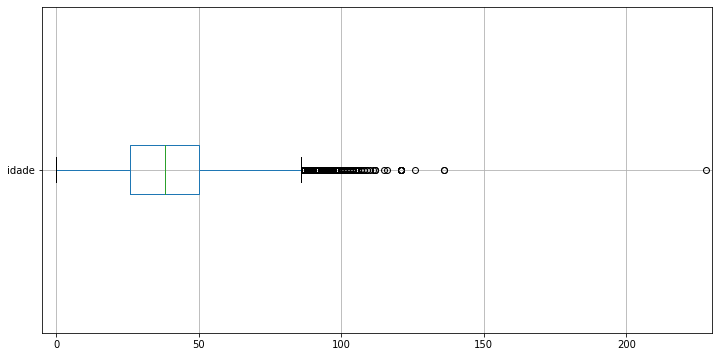

In [ ]:
fig, myax = plt.subplots(figsize=(12, 6))
myax.set_xlim([-5, 230])

df.boxplot(column='idade', vert=False, figsize=(10,5), ax=myax)

Como podemos ver, a maioria dos casos tem idade entre 25 e 50 anos, porém, tambem vemos que existem idades exorbitantes como 250 anos. Esses são *outliers*, e devemos remove-los. Aqui vamos considerar idades maiores que 110 *outliers*:

In [ ]:
# Retirando linhas cuja idade é maior do que 110

print("numero de linhas antes: ", df.shape[0])

df_rec = df[df['idade']<110]

print("numero de linhas depois: ",  df_rec.shape[0])

numero de linhas antes:  949983
numero de linhas depois:  949962


Com isso finalizamos o tratamento da idade, pois agora todos os dados da idade fazem sentido e tambem nao reduzimos drasticamente o tamanho do nosso dataframe, já que continua na cas do 949 mil linhas.

###Evolução caso
Agora, iremos nos preocupar em analisar a coluna evoluçãoCaso, porque é nela que contem a informação sobre a cura do paciente.

In [ ]:
df['evolucaoCaso'].unique()

array([nan, 'Cura', 'Em tratamento domiciliar', 'Cancelado', 'Ignorado',
       'Internado em UTI', 'Óbito', 'Internado'], dtype=object)

In [ ]:
df_rec = df_rec[['idade', 'evolucaoCaso', 'condicoes']]

In [ ]:
# Retirando linhas cuja evolução caso é: nan, Cancelado ou Ignorado

print("numero de linhas antes: ",  df_rec.shape[0])

df_rec = df_rec.loc[df_rec['evolucaoCaso'].isin(['Cura', 'Internado', 'Internado em UTI', 'Em tratamento domiciliar', 'Óbito'])]

print("numero de linhas depois: ",  df_rec.shape[0])

numero de linhas antes:  949962
numero de linhas depois:  268228


Haviam linhas em que o dado de evolução do caso estava faltando ou dizia 'Cancelado' ou 'Ignorado', esses dados são irrelevantes para nós, pois não dizem nada sobre a cura ou não do paciente, portanto retiramos esses dados. Porem, com isso quase 72% dos dados foram descartados, portanto constata-se que hove muita falta de informação aqui.


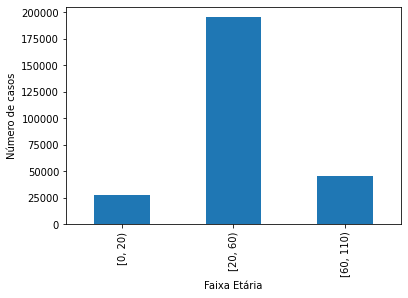

In [ ]:
# Calculando numero de curados e numero total de casos por faixa etaria
curados = pd.cut(df_rec.loc[ df_rec['evolucaoCaso']=='Cura' ]['idade'], [0,20,60,110], right=False).value_counts(sort=False)
todos = pd.cut(df_rec['idade'], [0,20,60,110], right=False).value_counts(sort=False)

todos.plot.bar()
plt.ylabel("Número de casos")
plt.xlabel("Faixa Etária")
plt.show()

Dividindo as faixas etarias como:
*   Jovem: 0-19 anos
*   Adulto: 20-59 anos
*   Idoso: 60-110 anos

Assim, percebe-se que realmente a maior parte da população se enquadra na faixa etaria adulta




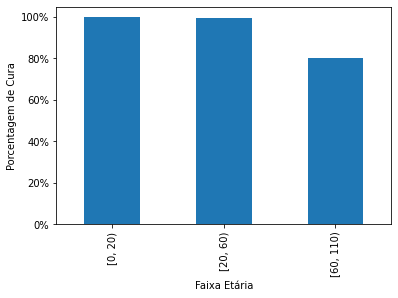

[0, 20)      99.848436
[20, 60)     99.189193
[60, 110)    80.266188
Name: idade, dtype: float64

In [ ]:
eixo = (curados*100/todos).plot.bar()
eixo.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylabel("Porcentagem de Cura")
plt.xlabel("Faixa Etária")

plt.show()


curados*100/todos

Entao, o grafico anterior representa a porcentagem de curados de cada faixa etaria. Com isso, percebe-se que inesperadamente os valores desse indice de cura é exageradamente alto, chegando a mais de 99% nos jovens e adultos, sendo assim, vemos que os dados podem estar mostrando uma estatistica diferente da realidade, e uma justificativa para isso seja a falta de informação presente de alguns pacientes que não alega-se nada a respeito a evolução do caso, como foi dito antes.

Porem, desconsiderando esses fatos, a analise final é que a taxa de cura dos idosos é a menor com quase 80% e conclui-se que a maior taxa de cura é a dos jovens chegando a 99,8%

In [ ]:
'''
contagem_evolucaoCaso = df_rec.groupby(pandas.cut(df_rec['idade'], [0, 20, 60, 110], right=False, include_lowest=True))['evolucaoCaso'].value_counts()

print(contagem_evolucaoCaso.to_frame())
# aux  = df_rec.groupby(df_rec['idade']).count()


# aux.to_frame()

df_propCurados = pandas.DataFrame(columns=['idade', 'totalCasos', 'totalCurados', 'propCurados'])

dicio_dataCurados = { }


# 'Traduzir' contagem_evolucaoCaso para um dicionario
# Criando dicionario para guardar totalCasos e totalCurados com base no intervalo da idade 
for index in range(0, len(contagem_evolucaoCaso.keys())):
    idade = str (contagem_evolucaoCaso.keys()[index][0])
    
    if idade not in dicio_dataCurados:
        dicio_dataCurados[idade] = {'totalCasos' : 0, 'totalCurados' : 0}
        
    dicio_dataCurados[idade]['totalCasos'] += contagem_evolucaoCaso[index] 
    
    if contagem_evolucaoCaso.keys()[index][1] == 'Cura':
        dicio_dataCurados[idade]['totalCurados'] += contagem_evolucaoCaso[index]


for idade in dicio_dataCurados.keys():
    dicio_dataCurados[idade]['idade'] = idade
    dicio_dataCurados[idade]['propCurados'] = dicio_dataCurados[idade]['totalCurados'] / dicio_dataCurados[idade]['totalCasos']
    df_propCurados = df_propCurados.append(dicio_dataCurados[idade], ignore_index=True)
    
    #print(dicio_dataCurados[idade])
    
    
#df_propCurados.to_csv('teste.csv')
pandas.set_option("max_rows", None)
display(df_propCurados)
        
#print(dicio_dataCurados)

# df_rec.groupby(['idade']).value_counts()
'''

'\ncontagem_evolucaoCaso = df_rec.groupby(pandas.cut(df_rec[\'idade\'], [0, 20, 60, 110], right=False, include_lowest=True))[\'evolucaoCaso\'].value_counts()\n\nprint(contagem_evolucaoCaso.to_frame())\n# aux  = df_rec.groupby(df_rec[\'idade\']).count()\n\n\n# aux.to_frame()\n\ndf_propCurados = pandas.DataFrame(columns=[\'idade\', \'totalCasos\', \'totalCurados\', \'propCurados\'])\n\ndicio_dataCurados = { }\n\n\n# \'Traduzir\' contagem_evolucaoCaso para um dicionario\n# Criando dicionario para guardar totalCasos e totalCurados com base no intervalo da idade \nfor index in range(0, len(contagem_evolucaoCaso.keys())):\n    idade = str (contagem_evolucaoCaso.keys()[index][0])\n    \n    if idade not in dicio_dataCurados:\n        dicio_dataCurados[idade] = {\'totalCasos\' : 0, \'totalCurados\' : 0}\n        \n    dicio_dataCurados[idade][\'totalCasos\'] += contagem_evolucaoCaso[index] \n    \n    if contagem_evolucaoCaso.keys()[index][1] == \'Cura\':\n        dicio_dataCurados[idade][\'to

###Justificativa

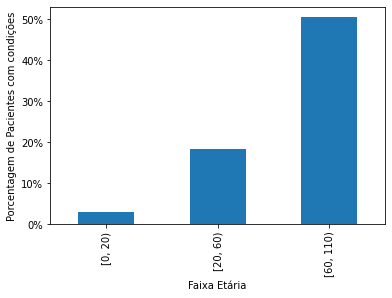

[0, 20)       3.049331
[20, 60)     18.421282
[60, 110)    50.564709
Name: idade, dtype: float64


In [ ]:
# Obtendo a taxa de pacientes com condicoes

df_condicoes = df_rec.dropna(subset=['condicoes'])
condicoes_c = pd.cut(df_condicoes['idade'], [0,20,60,110], right=False).value_counts(sort=False)

eixo = (condicoes_c*100/todos).plot.bar()
eixo.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylabel("Porcentagem de Pacientes com condições")
plt.xlabel("Faixa Etária")

plt.show()


print(condicoes_c*100/todos)

Agora buscamos justificar o porquê a faixa etaria dos jovens é a com mais taxa de cura. Analisando os dados, percebe-se que uma coluna que pode ter relação com isso é a coluna das condições, a qual diz se o paciente tem alguma condição especial de saude, como uma doença cronica por exemplo. Analisando esse dado montamos o grafico acima, que confirma que os idosos tem muita mais chance de conter condições especiais, e tambem, justifica em partes a maior taxa de cura por parte dos jovens, pois nessa faixa etaria apenas 3% dos pacientes tem alguma condição especial.

###Teste inferencial

Uma hipotese que havemos de testar é se as taxas de curas são iguais para as diferentes faixas etarias, pois isso nos mostraria que os dados realmente são inconclusivos. Isso se deve ao fato de que se as taxas de cura forem iguais, não poderiamos afirmar qual faixa etaria tem a maior taxa de cura.

Para testar isso, usaremos o teste qui-quadrado para as proporções, pois dessa forma poderemos calcular a frequencia esperada e comparar com as frequencias obtidas anteriormente. Dessa forma, devemos usar as hipoteses H0 e Ha como sendo:

*  H0: as proporções são iguais
*  Ha: as proporções são diferentes

Lembrando tambem que usaremos um alfa de 5%.

In [ ]:
!pip install scipy

In [ ]:
import scipy
import scipy.stats as stats


# Calculando valores esperados
esperado = (todos*sum(curados)/sum(todos)).to_list()
# Teste qui-quadrado para comparar proporções de duas populações
aux = stats.chisquare( curados.to_list(), f_exp=esperado  )


# obs = np.column_stack([curados.to_list(), todos.to_list()])
# aux = stats.chi2_contingency(obs)

print(aux)
print("\n\np-valor = ",aux[1] )


Power_divergenceResult(statistic=1412.9603582819732, pvalue=1.5120168293009308e-307)


p-valor =  1.5120168293009308e-307


Então, apos realizar o teste qui-quadrado, obtemos um p-valor muito proximo de zero, sendo assim, aceitamos a hipotese H0 -> as proporções são iguais. Dessa forma, confirmamos que as analises de qual é a faixa etaria com maior indice de cura podem estar invalidas.

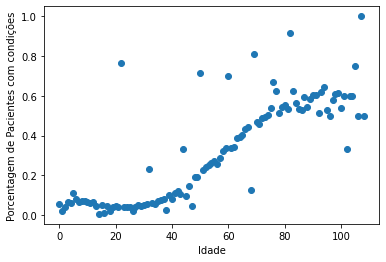

In [ ]:
pd.set_option('display.max_rows', None)

df_condicoes = df_rec.dropna(subset=['condicoes'])
condicoes_c = pd.cut(df_condicoes['idade'], np.arange(0,111), right=False).value_counts(sort=False)

todos = pd.cut(df_rec['idade'], np.arange(0,111), right=False).value_counts(sort=False)

# print(condicoes_c/todos)

plt.plot(np.arange(0,110), (condicoes_c/todos).to_list(), 'o')
plt.xlabel("Idade")
plt.ylabel("Porcentagem de Pacientes com condições")
plt.show()

Agora, testaremos se a idade esta relacionada com a taxa de condições especiais medicas dos pacientes, e para isso usaremos o teste do coeficiente de Pearson. O motivo de usar esse teste é porque ele nos auxilia a dizer se existe alguma correlação entre as duas variaveis, e como podemos ver no grafico, parece que existe essa tendencia, mas tambem existem muitos pontos fora de controle, por isso usaremos o teste de hipotese.

In [ ]:
aux = stats.pearsonr(np.arange(0,109), (condicoes_c/todos).to_list()[:109])

print(aux, "\n\np-valor = ", aux[1])

(0.8417713861117185, 2.0477426528579136e-30) 

p-valor =  2.0477426528579136e-30


Realizando o teste, percebe-se que realmente existe essa correlação que estavamos esperando, ou seja, conforme a idade cresce, a proporção de pacientes com condições especiais de saude tambem aumenta. Isso tambem, comprova que a nossa analise inicial sobre o indice de curados é invalida.

###Conclusão

Ao fim de nossos estudos descobrimos que apesar de os dados mostrarem que a faixa etaria jovem é a com mais taxa de cura, essa estatistica pode estar errada. Porem, conforme o senso comum e os dados de diferentes outras doenças essa decisão faz sentido, no entanto, aqui vemos que as taxas de cura são estatisticamente iguais, fazendo com que não possamos afirmar nada sobre essa questão. Por outro lado, vimos tambem que a taxa de condições especiais de saude que tornam o paciente mais "fragil" são maiores na faixa etaria dos idosos. Entao, esse fato comprova que o raciocinio de que possivelmente os jovens realmente são menos afetados pela covid, porem ressalta-se que os dados não comprovam esse indice.